In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
slash = '/'
df = pd.read_csv('..'+slash+'data'+slash+'df.csv',sep=';',index_col=0)

In [2]:
df.head()

,region,subregion,state,vot19_14,turnout14,turnout19,turnout19_14,state_abbrev,debt_2013,debt_2014,...,f_crime_2015,total_suspects_2014,foreign_suspects_2014,f_crime_2014,total_suspects_2013,foreign_suspects_2013,f_crime_2013,total_suspects_2012,foreign_suspects_2012,f_crime_2012
Nr,,,,,,,,,,,,,,,,,,,,,
1001,"Flensburg, Stadt",1.0,Schleswig-Holstein,-0.003027,0.357400,0.562920,0.205520,KS,16.41,16.40,...,32.5,233.0,66.0,28.3,207.0,45.0,21.7,277.0,42.0,15.2
1002,"Kiel, Landeshauptstadt",1.0,Schleswig-Holstein,0.060316,0.402589,0.588603,0.186015,KS,12.04,12.03,...,26.4,463.0,80.0,17.3,439.0,113.0,25.7,490.0,95.0,19.4
1003,"Lübeck, Hansestadt",1.0,Schleswig-Holstein,0.551817,0.376398,0.546124,0.169726,KS,15.25,15.59,...,23.4,512.0,109.0,21.3,509.0,85.0,16.7,526.0,101.0,19.2
1004,"Neumünster, Stadt",1.0,Schleswig-Holstein,2.392481,0.453649,0.482205,0.028556,KS,16.61,16.94,...,31.6,241.0,59.0,24.5,241.0,54.0,22.4,247.0,45.0,18.2
1051,Dithmarschen,1.0,Schleswig-Holstein,3.374651,0.397193,0.544108,0.146915,K,12.52,12.80,...,12.2,167.0,19.0,11.4,151.0,25.0,16.6,227.0,23.0,10.1


In [3]:
[print(a) for a in df.columns]

region
subregion
state
vot19_14
turnout14
turnout19
turnout19_14
state_abbrev
debt_2013
debt_2014
debt_2015
debt_2016
debt_2017
debt_2018
ove18_13
area_2017
population_2017
germans_2017
foreigners_2017
population_density_2017
birth_balance_2017
net_migration_2017
age_to_18_2017
age_18_24_2017
age_25_34_2017
age_35_59_2017
ag4_60_74_2017
age_75_more_2017
disposable_inc_2016
gdp_2016
protection_total_2017
protection_open_2017
protection_accepted_2017
protection_rejected_2017
dwellings_new_2017
dwellings_2017
space_per_app_2017
space_per_inh_2017
vehicles_2018
graduates_voc_2017
Absolventen/Abgänger allgemeinbildender Schulen 2017 - insgesamt ohne Externe (je 1000 Einwohner)
graduates_without_secondary_2017
graduates_lower_secondary_2017
graduates_secondary_2017
graduates_higher_2017
child_day_care_2018
business_reg_2017
insolvencies_2017
empl_total_2018
empl_agr_2018
empl_manuf_2018
empl_com_hotel_2018
empl_service_2018
empl_oth_service_2018
hartz_total_2018
hartz_no_empl_2018
hartz_fore

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [4]:
df[df.subregion>=11].state.unique()

array(['Berlin', 'Brandenburg', 'Mecklenburg-Vorpommern', 'Sachsen',
       'Sachsen-Anhalt', 'Thüringen'], dtype=object)

In [5]:
east_ind = df.subregion>=11
df['east'] = east_ind*1

<IPython.core.display.Javascript object>


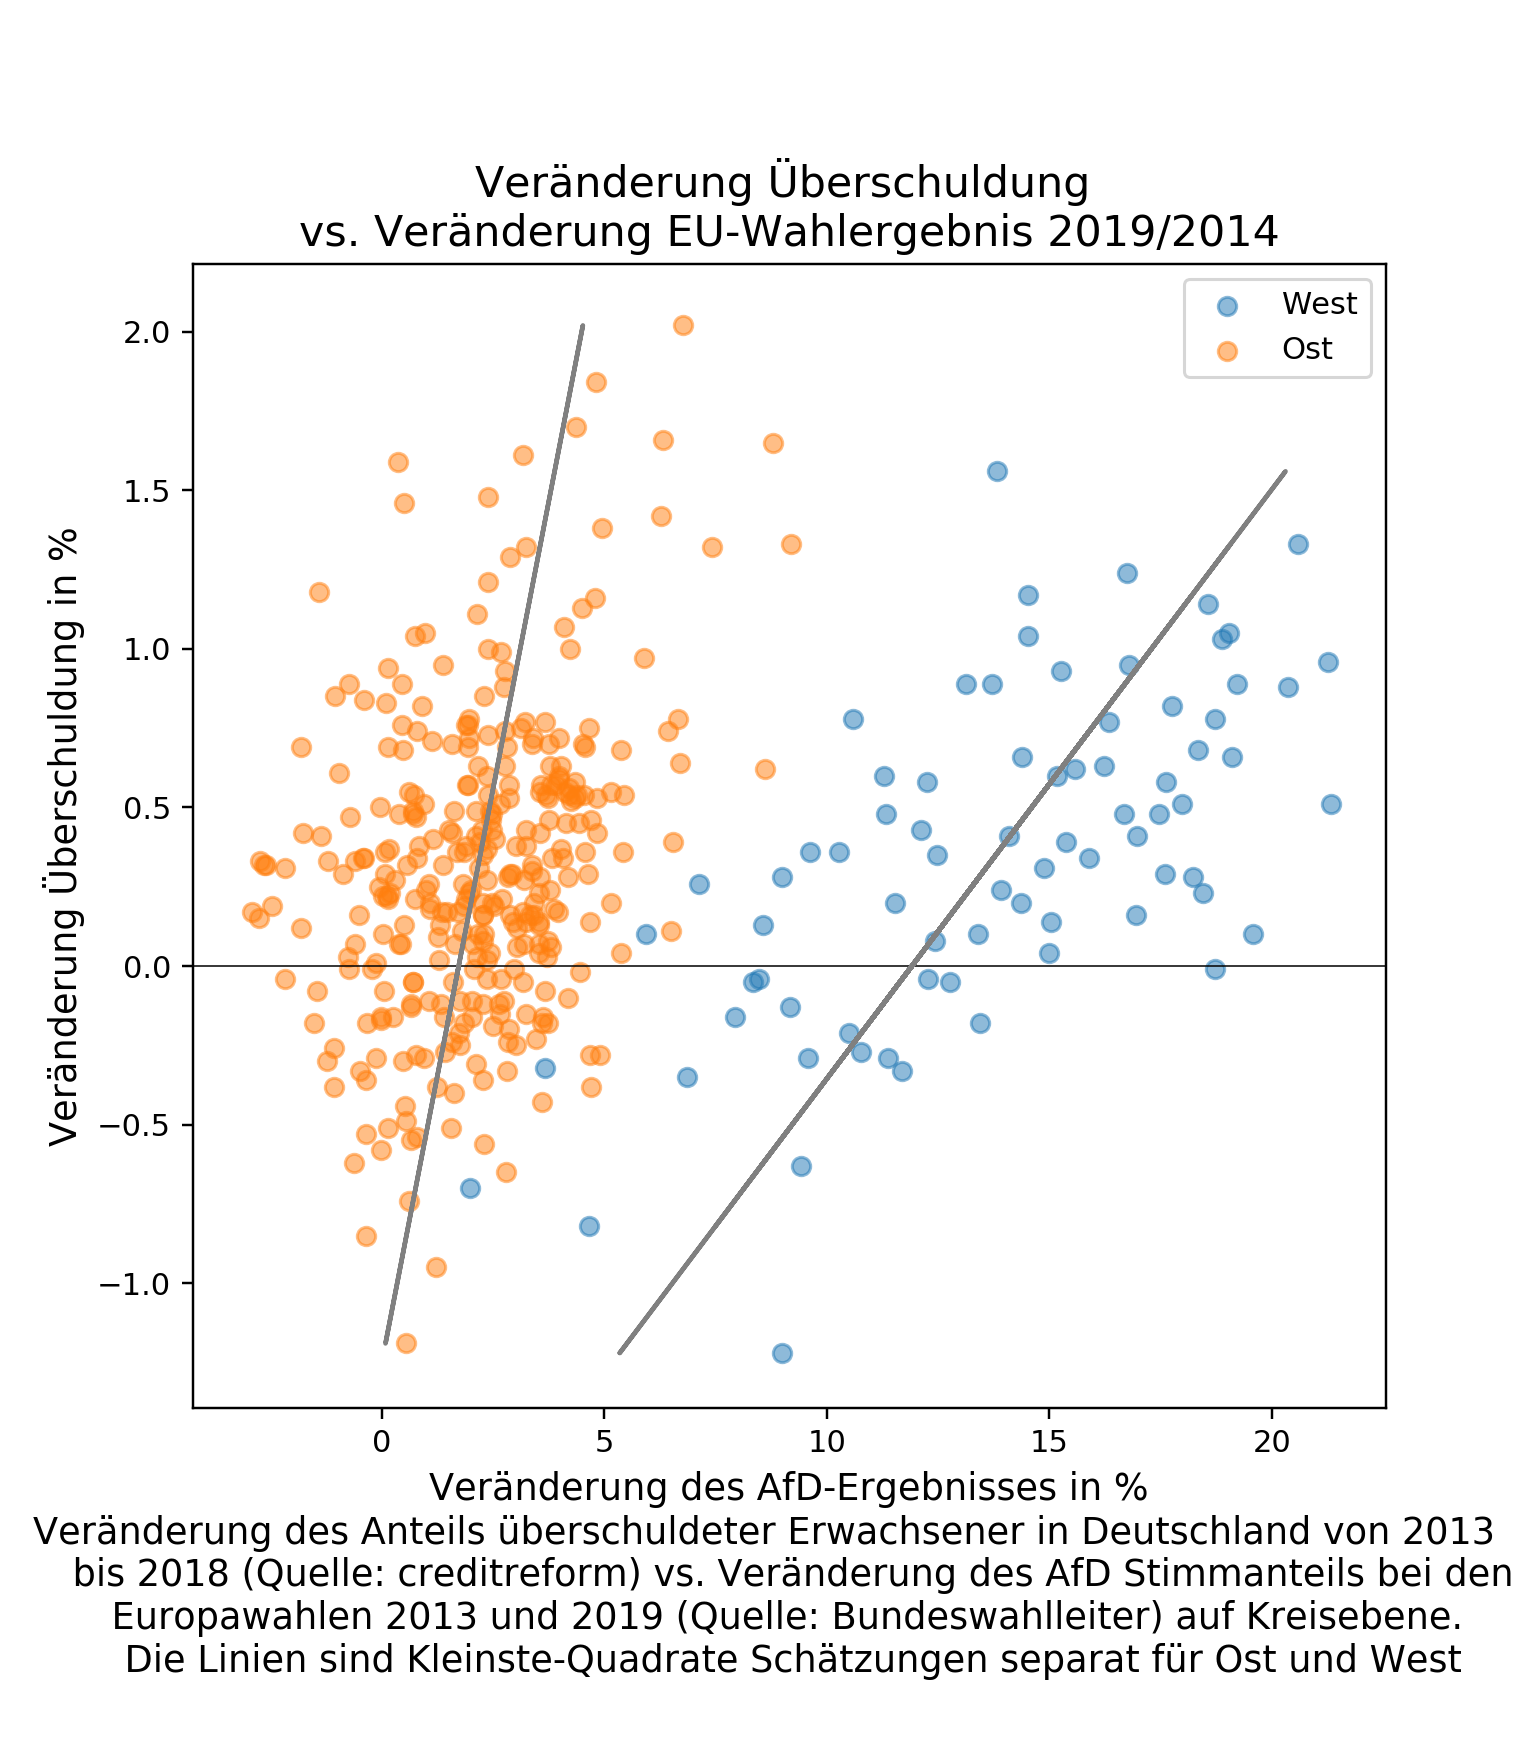

In [6]:
f, (ax2) = plt.subplots(1, 1)#, sharey=True)
#f.figsize=(6,4)
plt.subplots_adjust(top=0.85,bottom=0.2)
language = 'german'# 'eng' or german
if language == 'eng':
    title_left = 'Overindebtedness 2019\nvs. Voteshare'
    ylabel_left = 'Overindebtedness'
    xlabel_left = 'AfD result in %'
    title_right = 'Change in Overindebtedness\nvs. Voteshare'
    ylabel_right = 'Change of Overindebtedness'
    xlabel_right = 'Change of AfD result in %'
    figname = 'figures\\Overindebtedness and AfD-electoral results.png'
    txt = """Change of percentage of overindebted adults in Germany from 2013 to 2018 
    (source: creditreform) against change in AfD's electoral results European 
    Elections 2014 and 2019 in percent (source: Bundeswahlleiter)"""
if language == 'german':
    title_left = 'Überschuldung \nvs. EU-Wahlergebnis 2019'
    ylabel_left = 'Überschuldung'
    xlabel_left = 'AfD-Ergebnis in %'
    title_right = 'Veränderung Überschuldung \nvs. Veränderung EU-Wahlergebnis 2019/2014'
    ylabel_right = 'Veränderung Überschuldung in %'
    xlabel_right = 'Veränderung des AfD-Ergebnisses in %'
    figname = 'figures\\Überschuldung und AfD Wahlergebnis Europawahl 2019.png'
    txt = """Veränderung des Anteils überschuldeter Erwachsener in Deutschland von 2013 
    bis 2018 (Quelle: creditreform) vs. Veränderung des AfD Stimmanteils bei den
    Europawahlen 2013 und 2019 (Quelle: Bundeswahlleiter) auf Kreisebene. 
    Die Linien sind Kleinste-Quadrate Schätzungen separat für Ost und West"""

#ax1.set_title(title_left)
#ax1.scatter( df.afd_val19,df['2018'],color='black',alpha=0.5)
#ax1.set_ylabel(ylabel_left)
#ax1.set_xlabel(xlabel_left)
fontsize_labels = 12

ax2.set_title(title_right, fontsize = (fontsize_labels+2))
ax2.scatter(df[df.east==1].vot19_14,
            df[df.east==1].ove18_13, label=('West'),alpha=0.5 )
ax2.scatter(df[df.east==0].vot19_14, 
            df[df.east==0].ove18_13, label=('Ost'),alpha=0.5 )
ax2.axhline(color='black',lw=0.5)
ax2.set_ylabel(ylabel_right, fontsize=fontsize_labels)
ax2.set_xlabel(xlabel_right, fontsize=fontsize_labels)
ax2.legend()
#plt.subplots_adjust(wspace=0.4)

f.text(.5, .05, txt, ha='center', fontsize=fontsize_labels)

# resize the figure to match the aspect ratio of the Axes    
f.set_size_inches(7, 8, forward=True)


# estimate slopes
y_west = df[df.east==1].vot19_14
y_east = df[df.east==0].vot19_14
x_west = np.array(df[df.east==1].ove18_13.values).reshape(-1, 1)
x_east = np.array(df[df.east==0].ove18_13.values).reshape(-1, 1)

reg_west = LinearRegression().fit(x_west, y_west)


y_hat_west = reg_west.predict(x_west)

ax2.plot(y_hat_west,x_west,color='grey')

reg_east = LinearRegression().fit(x_east, y_east)

y_hat_east = reg_east.predict(x_east)

ax2.plot(y_hat_east,x_east,color='grey')
plt.savefig('Überschuldung.png')

In [7]:
print('Score East-Germany: ',reg_east.score(x_east, y_east))
print('Score West-Germany: ',reg_west.score(x_west, y_west))

Score East-Germany:  0.10507320363565988
Score West-Germany:  0.41567931481658354


# Plotting maps

There is some useful information on changes of regions over time (in German) https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/_inhalt.html.

<IPython.core.display.Javascript object>


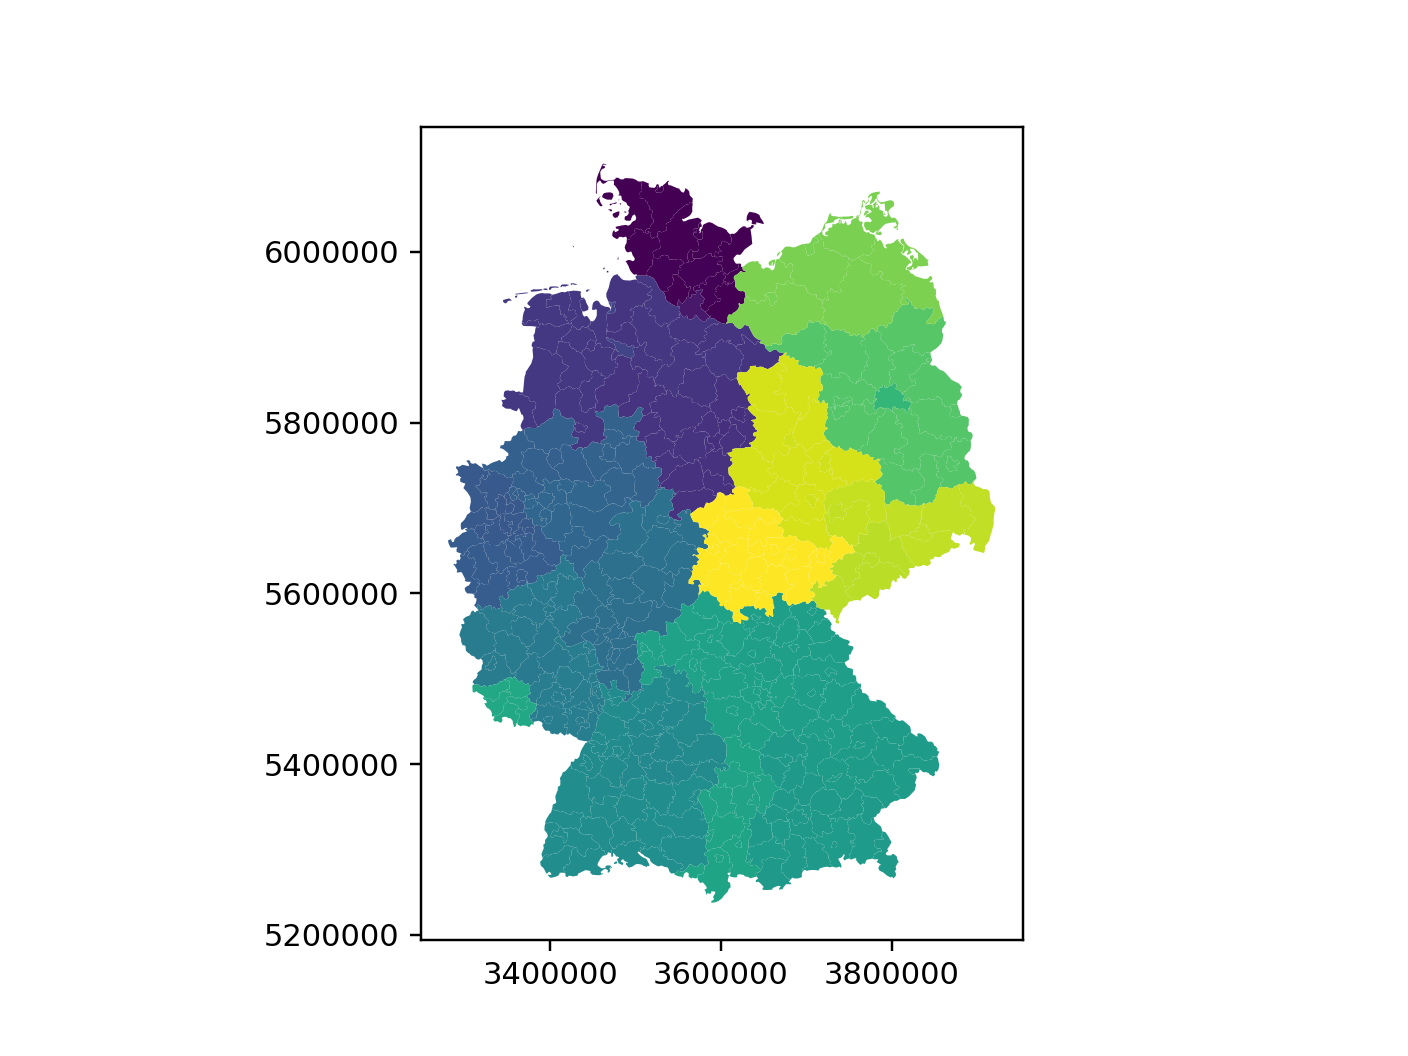

In [8]:
# installing geopandas on a 32-bit, windows machine and python 3.7 was unexpectedly cumbersome. 
# downloading and installing spacely, fiona, gdal, rtree and pyproj wheels and pip installing 
# it worked. As 3.01 didn't work, using 2.4.1, pip install --upgrade setuptools and Microsoft 
# Build Tools for Visual Studio 2019 (https://wiki.python.org/moin/WindowsCompilers)
# the did the trick.
import geopandas
import descartes
from mpl_toolkits.axes_grid1 import make_axes_locatable


df_geo = geopandas.read_file('..'+slash+'data'+slash+'geodata'+slash+'vg2500_krs.shx')
# key for merge with df is RS
df_geo.RS = df_geo.RS.str.replace(r'^0','').astype(int)
df_geo =df_geo.to_crs({'init':'epsg:31467'})
df_geo.plot(column='RS')

In [9]:
# göttingen (3152) and osterode (3156) are now one region
df_geo.RS[df_geo.RS==3156] = 3159
df_geo.RS[df_geo.RS==3152] = 3159
df_geo = df_geo.dissolve(by='RS')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_geo = df_geo.merge(df, left_index=True, right_on='Nr',how='left')
# change projection for "usual" aspect of maps of Germany
df_geo =df_geo.to_crs({'init':'epsg:31467'})

df_geo.head()

,geometry,USE,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,region,subregion,state,vot19_14,...,total_suspects_2014,foreign_suspects_2014,f_crime_2014,total_suspects_2013,foreign_suspects_2013,f_crime_2013,total_suspects_2012,foreign_suspects_2012,f_crime_2012,east
Nr,,,,,,,,,,,,,,,,,,,,,
1001,"POLYGON ((3531551.016 6077191.723, 3532515.909...",4,010010000000,Flensburg,32467.034276,5.324899e+07,"Flensburg, Stadt",1.0,Schleswig-Holstein,-0.003027,...,233.0,66.0,28.3,207.0,45.0,21.7,277.0,42.0,15.2,0
1002,"POLYGON ((3577409.674 6029439.547, 3576962.967...",4,010020000000,Kiel,73027.302434,1.218654e+08,"Kiel, Landeshauptstadt",1.0,Schleswig-Holstein,0.060316,...,463.0,80.0,17.3,439.0,113.0,25.7,490.0,95.0,19.4,0
1003,"POLYGON ((3624323.897 5982346.682, 3625006.427...",4,010030000000,Lübeck,104861.094220,2.211386e+08,"Lübeck, Hansestadt",1.0,Schleswig-Holstein,0.551817,...,512.0,109.0,21.3,509.0,85.0,16.7,526.0,101.0,19.2,0
1004,"POLYGON ((3567698.625 6000346.812, 3566961.127...",4,010040000000,Neumünster,39858.818376,8.092363e+07,"Neumünster, Stadt",1.0,Schleswig-Holstein,2.392481,...,241.0,59.0,24.5,241.0,54.0,22.4,247.0,45.0,18.2,0
1051,"MULTIPOLYGON (((3479613.059 5992136.472, 34799...",4,010510000000,Dithmarschen,202206.675707,1.450311e+09,Dithmarschen,1.0,Schleswig-Holstein,3.374651,...,167.0,19.0,11.4,151.0,25.0,16.6,227.0,23.0,10.1,0


<IPython.core.display.Javascript object>


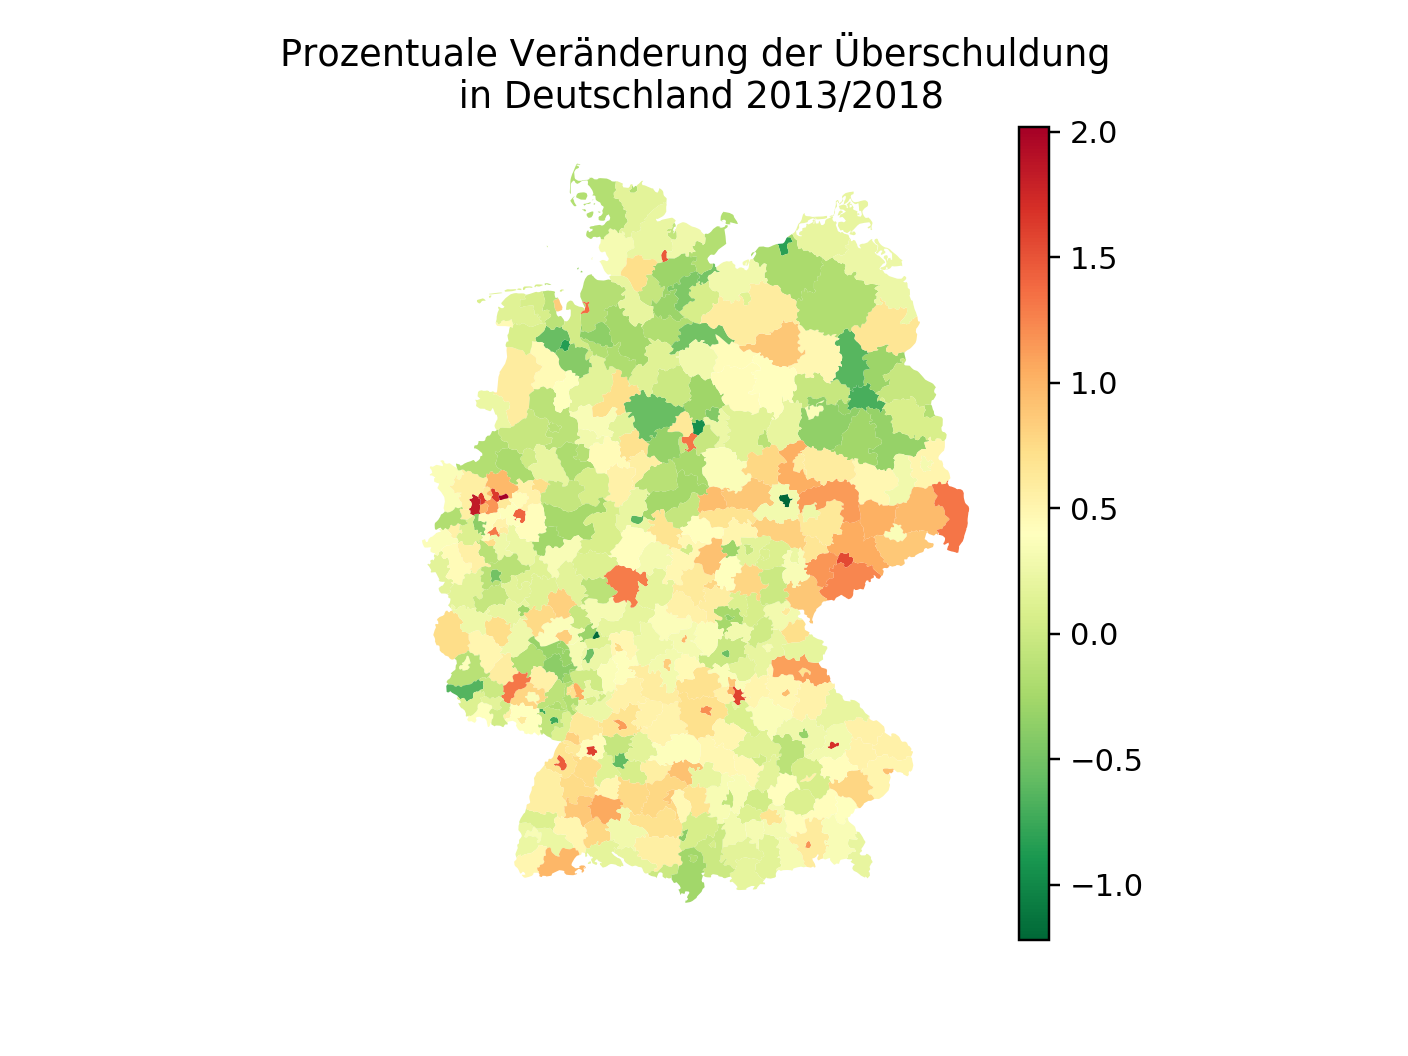

In [11]:
fig, (ax1) = plt.subplots(1, 1)

#plot.title()
ax1.title.set_text('Prozentuale Veränderung der Überschuldung\n in Deutschland 2013/2018')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
df_geo.plot(column='ove18_13', ax=ax1, legend=True, cax=cax,cmap='RdYlGn_r')
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax1.axis('off')
plt.savefig('Überschuldung_Veränderung_2018_2013.png')

<IPython.core.display.Javascript object>


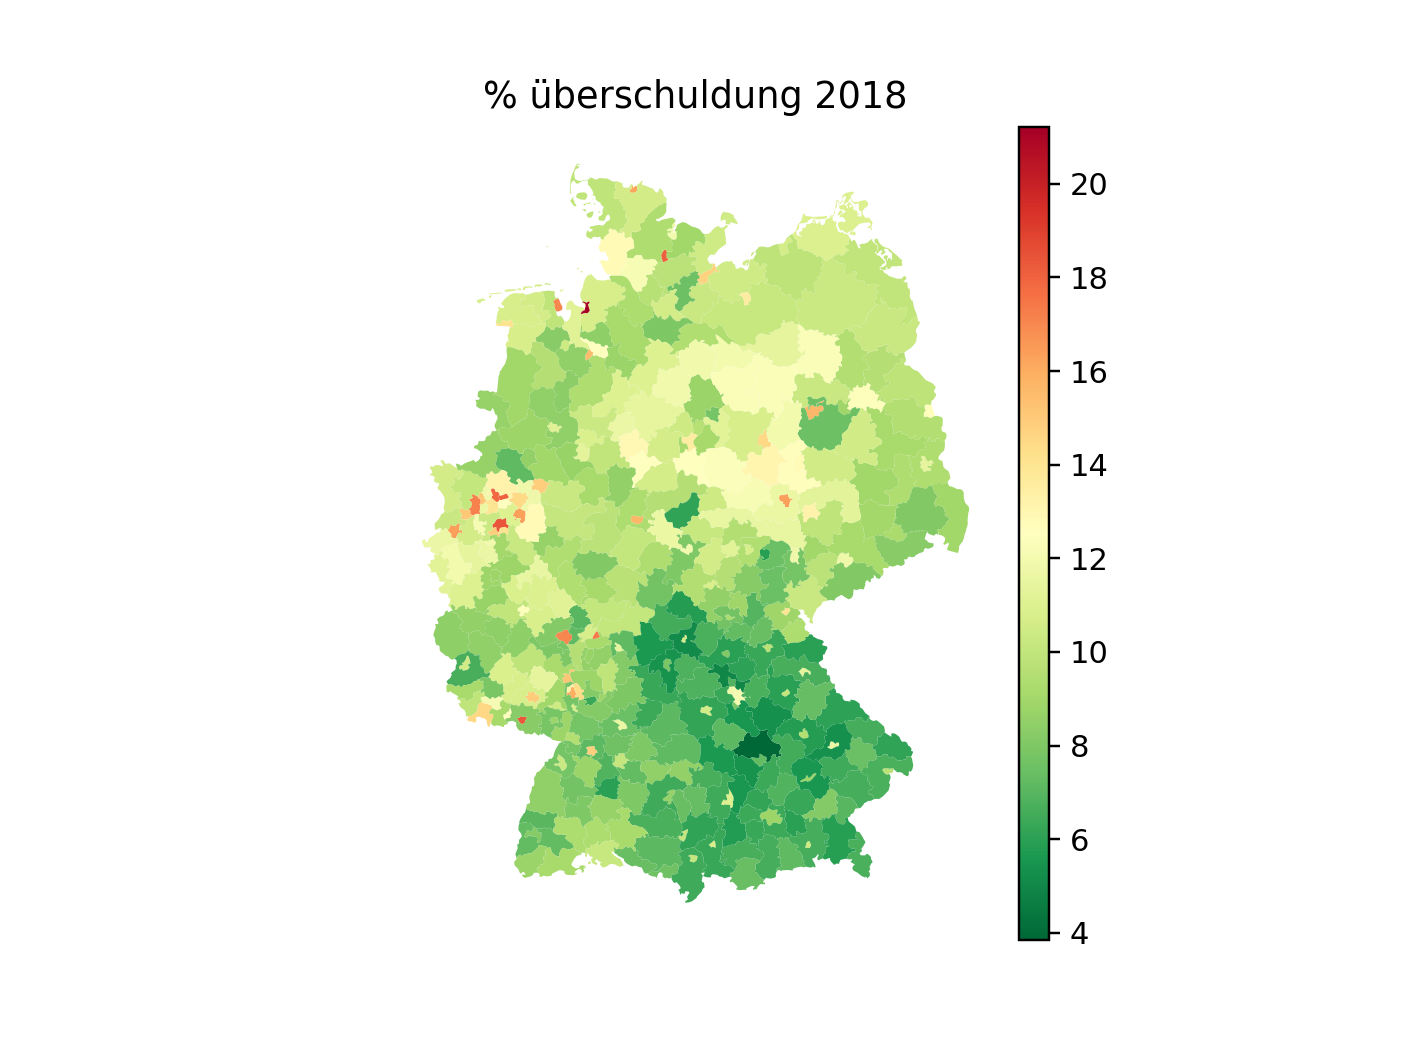

In [12]:
fig, (ax2) = plt.subplots(1, 1)
ax2.title.set_text('% überschuldung 2018')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)
df_geo.plot(column='debt_2018', ax=ax2, legend=True, cax=cax,cmap='RdYlGn_r')
ax2.axes.get_xaxis().set_ticks([])
ax2.axes.get_yaxis().set_ticks([])
ax2.axis('off')
plt.savefig('Überschuldung_2018.png')

<IPython.core.display.Javascript object>


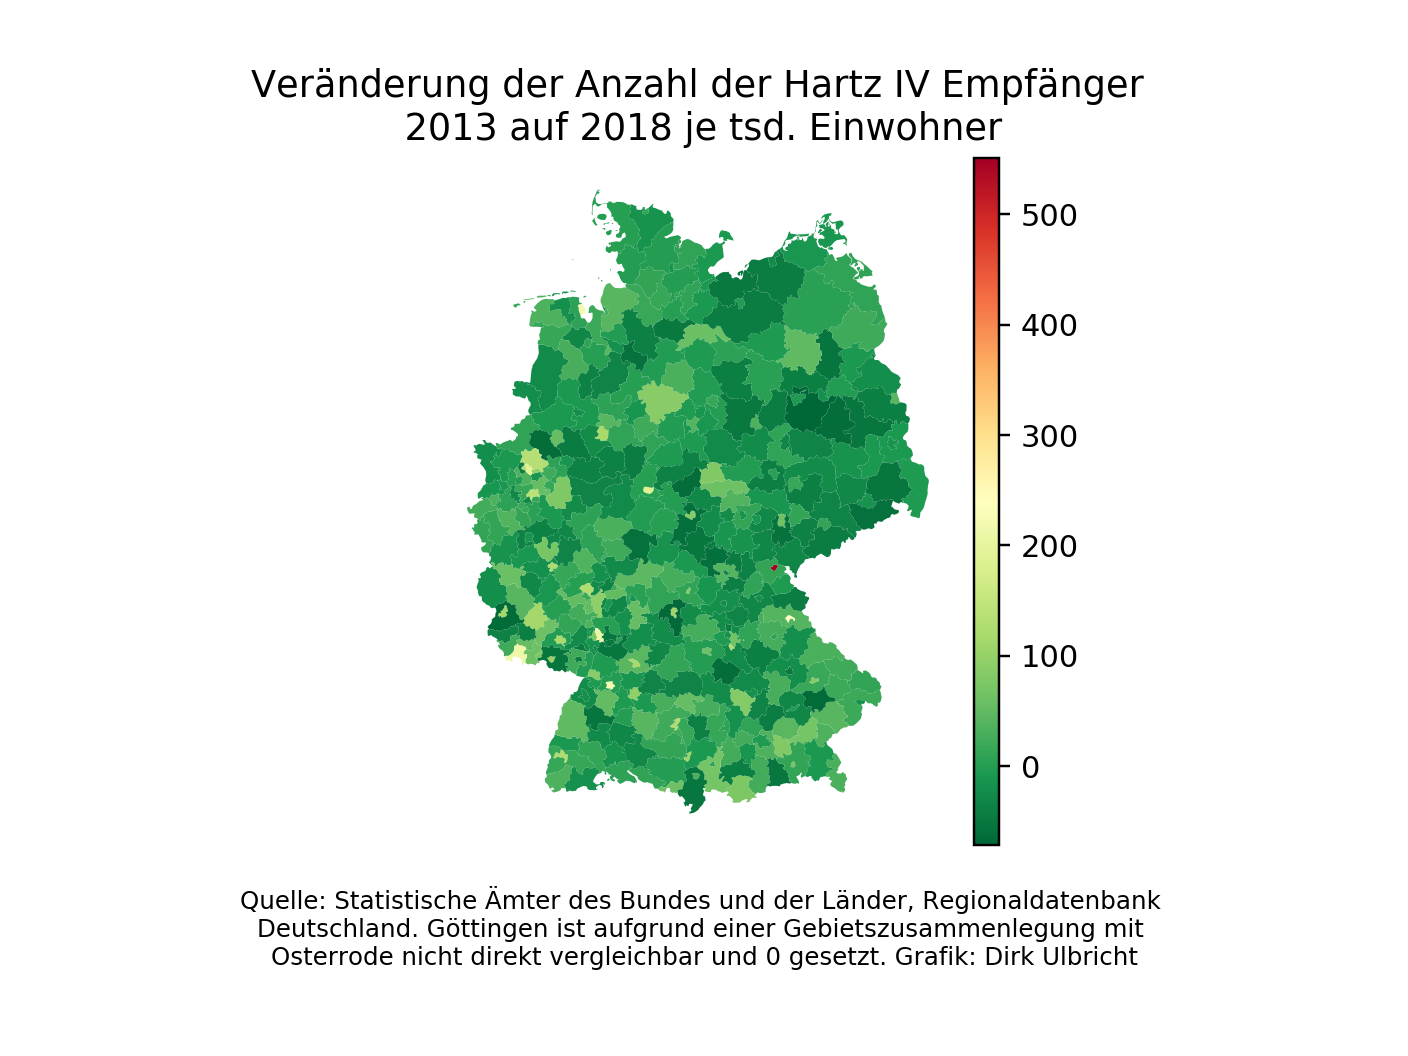

Text(0.5, 0.06, 'Quelle: Statistische Ämter des Bundes und der Länder, Regionaldatenbank \nDeutschland. Göttingen ist aufgrund einer Gebietszusammenlegung mit \nOsterrode nicht direkt vergleichbar und 0 gesetzt. Grafik: Dirk Ulbricht\n')

In [13]:
fig, (ax1) = plt.subplots(1, 1)
plt.subplots_adjust(top=0.85,bottom=0.2)
txt="""Quelle: Statistische Ämter des Bundes und der Länder, Regionaldatenbank 
Deutschland. Göttingen ist aufgrund einer Gebietszusammenlegung mit 
Osterrode nicht direkt vergleichbar und 0 gesetzt. Grafik: Dirk Ulbricht
"""
#plot.title()
ax1.title.set_text('% of overindebted adults\nChange from 2014 to 2018')
ax1.title.set_text('Veränderung der Anzahl der Hartz IV Empfänger\n 2013 auf 2018 je tsd. Einwohner')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
df_geo.plot(column='hartz_total_2018_2013', ax=ax1, legend=True, cax=cax,cmap='RdYlGn_r')
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax1.axis('off')
fig.text(0.5, .06, txt, ha='center', fontsize=8)
# resize the figure to match the aspect ratio of the Axes    
#fig.set_size_inches(7, 8, forward=True)

In [14]:
df.iloc[:,df.columns.str.contains('hartz')].sort_values(by='hartz_total_2018_2013',ascending=False)

,hartz_total_2018,hartz_no_empl_2018,hartz_foreign_2018,hartz_total_2018_2013,hartz_no_empl_2018_2013,hartz_total_2013,hartz_no_empl_2013
Nr,,,,,,,
9464,114.5,29.4,51.6,550.568182,-1.672241,96.6,28.7
9363,74.7,25.5,32.9,241.095890,-11.764706,89.6,29.6
8231,96.1,30.9,50.5,221.404682,7.291667,88.0,33.1
3405,155.9,24.6,30.1,220.123203,-20.900322,131.4,26.9
10041,133.5,26.6,40.8,211.915888,-5.673759,111.7,27.0
...,...,...,...,...,...,...,...
5558,41.3,29.3,36.7,-63.386525,3.900709,39.6,31.0
9279,20.6,24.5,35.6,-64.236111,-10.583942,16.1,29.0
7235,28.2,29.8,35.8,-65.900846,-0.996678,24.4,27.6


<IPython.core.display.Javascript object>


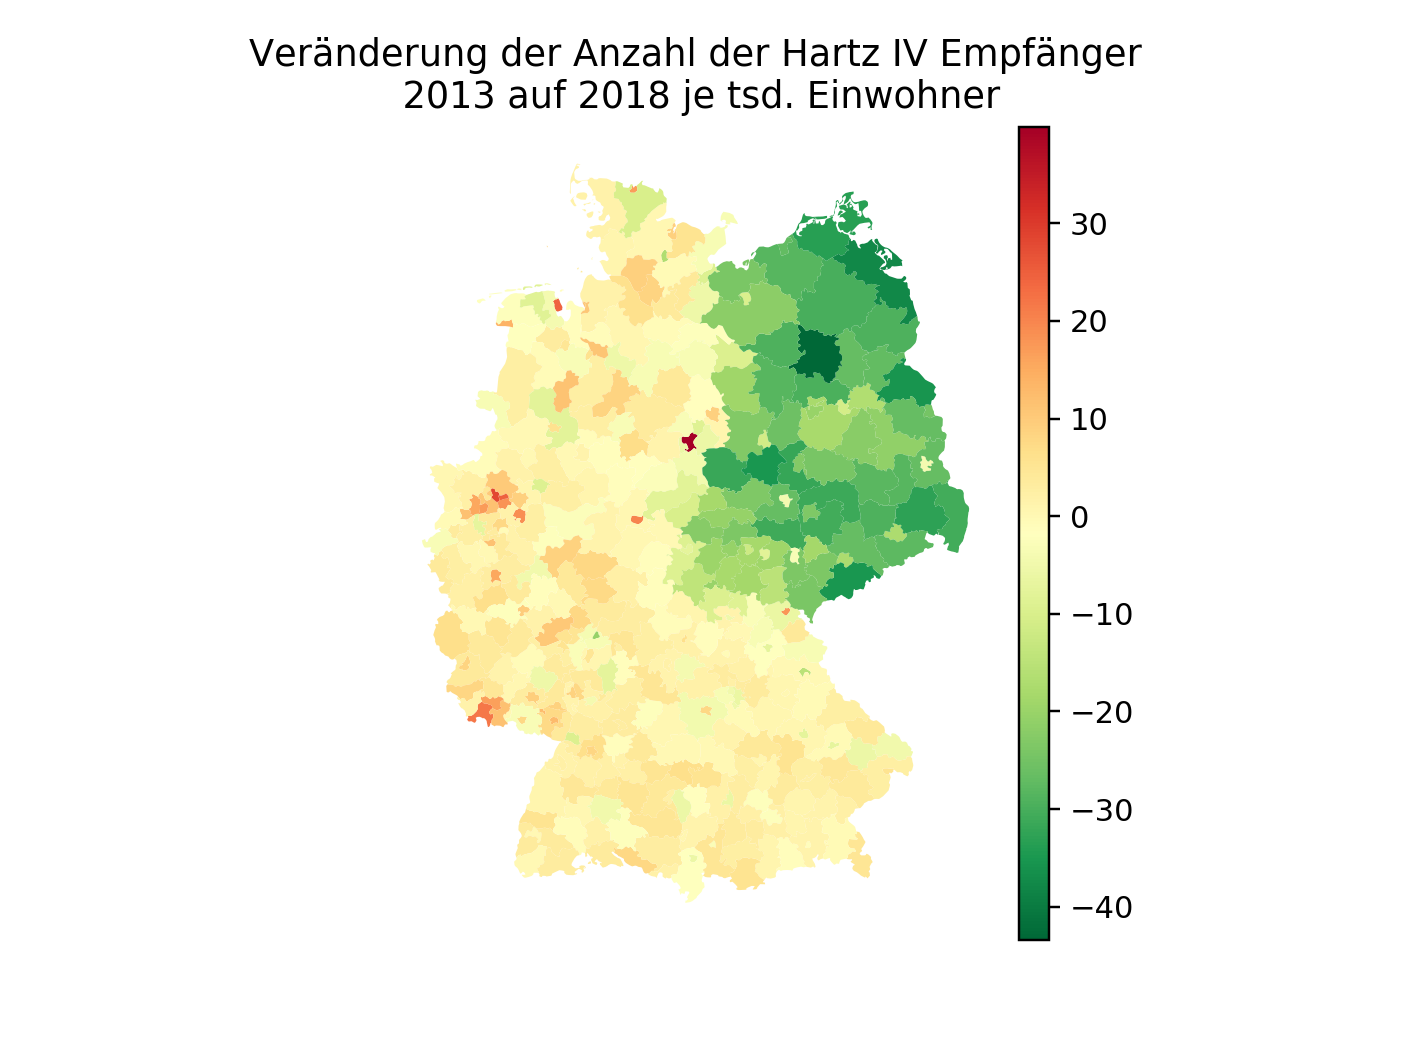

(3248294.5408406756, 3953310.382441411, 5194242.485414251, 6146624.286540029)

In [15]:
fig, (ax1) = plt.subplots(1, 1)

#plot.title()
ax1.title.set_text('% of overindebted adults\nChange from 2013 to 2018')
ax1.title.set_text('Veränderung der Anzahl der Hartz IV Empfänger\n 2013 auf 2018 je tsd. Einwohner')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
df_geo['Hartz_Veränderung']=(df_geo.hartz_total_2018 - df_geo.hartz_total_2013)
df_geo.plot(column='Hartz_Veränderung', ax=ax1, legend=True, cax=cax,cmap='RdYlGn_r')
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax1.axis('off')


In [18]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()

app.layout = html.Div('Dash tutorials')

if __name__ == '__main__':
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 380-130-474
Debugger PIN: 380-130-474
Debugger PIN: 380-130-474
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 48] Address already in use